In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
# df.info()
df.duplicated().sum()

529

In [4]:
df = df.drop_duplicates()

In [5]:
df.shape

(12791, 9)

In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [7]:
# df=df['balcony'].astype(int)
# df['society'] = df['society'].fillna(df['society'].mode()[0])

In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

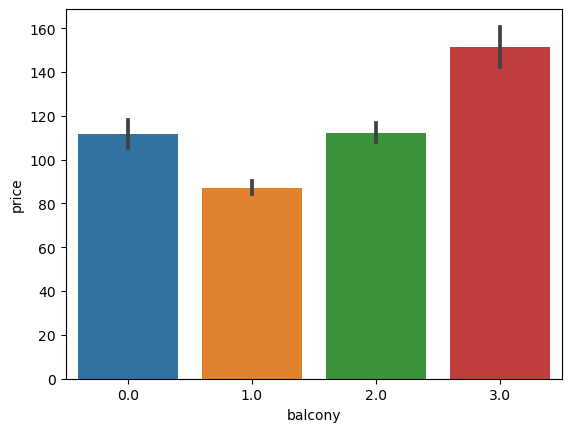

In [9]:
sns.barplot(data=df,x='balcony',y='price')
plt.show()

In [10]:
df.corr(numeric_only=True)

,bath,balcony,price
bath,1.000000,0.200387,0.453099
balcony,0.200387,1.000000,0.118645
price,0.453099,0.118645,1.000000


In [11]:
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [12]:
df[df['bath'] > 20]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,NaN,8000,27.0,0.0,230.0
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0


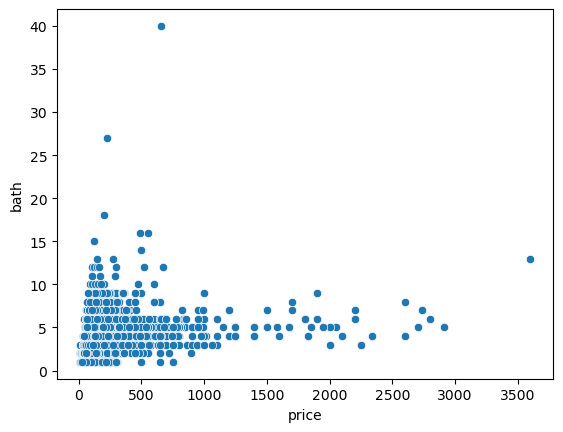

In [13]:
sns.scatterplot(data=df,x='price',y='bath')
plt.show()

In [14]:
df['location'] = df['location'].fillna('Sarjapur  Road')

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16540\3003814536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].fillna('Sarjapur  Road')


In [15]:
df['size'] = df['size'].fillna('2 BHK')
df['bath']= df['bath'].fillna(df['bath'].median())
df['bhk'] = df['size'].str.split(" ").str[0].astype(int)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16540\2901861073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'].fillna('2 BHK')
C:\Users\Abhi\AppData\Local\Temp\ipykernel_16540\2901861073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath']= df['bath'].fillna(df['bath'].median())
C:\Users\Abhi\AppData\Local\Temp\ipykernel_16540\2901861073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [16]:
# df['size'].str.split(" ").str[0].astype(int)
# df['size'].isnull().sum()
df['size']=df['size'].fillna('2 BHK')
df['bhk'] = df['size'].str.split(" ").str[0].astype(int)
df
# df['size'] = df['size'].str.split(" ").str[0].astype(int)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16540\2585565768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size']=df['size'].fillna('2 BHK')
C:\Users\Abhi\AppData\Local\Temp\ipykernel_16540\2585565768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk'] = df['size'].str.split(" ").str[0].astype(int)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2


<Axes: >

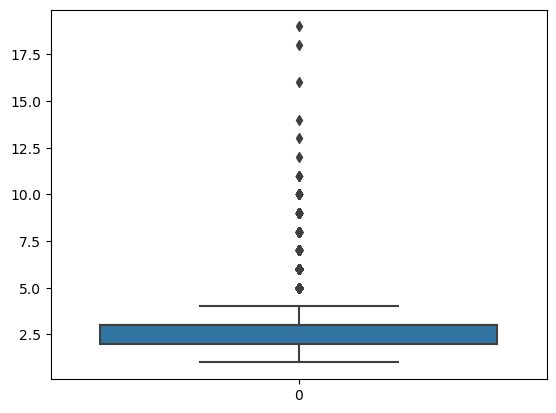

In [17]:
# df['bhk'].describe()
# df[df['bhk'] < 20]
# sns.boxplot(data =df,x='bhk')
df = df[df['bhk'] < 20]
sns.boxplot(df['bhk'])

In [18]:
def check_str(val):
    try:
        float(val) 
    except:
        return True
    return False    

df[df['total_sqft'].apply(check_str)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,2.0,NaN,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,2.0,NaN,224.500,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,Bhath N,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,2.0,NaN,52.570,1


In [19]:
def convert_range(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
        
df['total_sqft'] = df['total_sqft'].apply(convert_range)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16540\1502352484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(convert_range)


In [20]:
def check_str(val):
    try:
        float(val) 
    except:
        return True
    return True    

df[df['total_sqft'].apply(check_str)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2


In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [23]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [24]:
df['location'].value_counts()

location
Whitefield                     381
Sarjapur  Road                 298
Electronic City                229
Thanisandra                    206
Kanakpura Road                 195
                              ... 
Kaveri Nagar                     1
New Gurappana Palya              1
Chikkabanavar                    1
Bommasandra Industrial Area      1
Abshot Layout                    1
Name: count, Length: 633, dtype: int64

In [25]:
df['location'] = df['location'].apply(lambda x:x.strip())

In [26]:
loc_value = df['location'].value_counts()
# to_be_other = 
to_be_other = loc_value[loc_value.values <= 10].index
df['location'] = df['location'].apply(lambda x:'others' if x in to_be_other else x)
df['location'].value_counts()

location
others              1452
Whitefield           382
Sarjapur  Road       298
Electronic City      231
Thanisandra          209
                    ... 
AECS Layout           11
Chikka Tirupathi      11
Neeladri Nagar        11
Rajiv Nagar           11
Bommenahalli          11
Name: count, Length: 140, dtype: int64

In [27]:
# df['location'].unique()
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

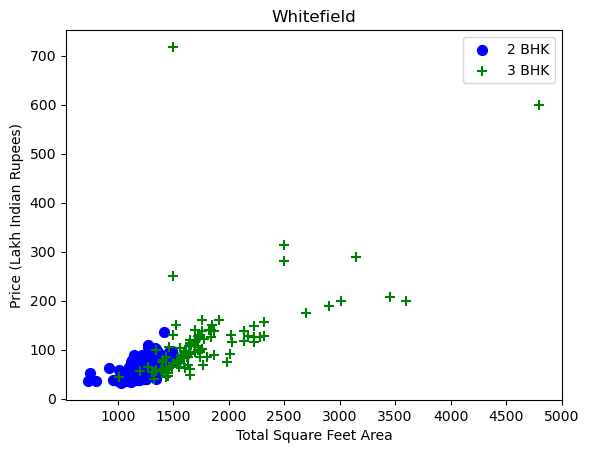

In [28]:
plot_scatter_chart(df,"Whitefield")

In [29]:
df['area_type'].value_counts()

area_type
Super built-up  Area    5669
Built-up  Area          1148
Plot  Area               262
Carpet  Area              51
Name: count, dtype: int64

In [30]:
df['availability'].value_counts()

availability
Ready To Move    5446
18-May            168
18-Dec            164
19-Dec            148
18-Apr            146
                 ... 
20-May              1
15-Jun              1
20-Mar              1
16-Mar              1
14-Jul              1
Name: count, Length: 74, dtype: int64

In [31]:
# df['availability'] = df['availability'].apply(lambda x:1 if 'Ready To Move' else 0)

In [32]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-Nov', '17-Oct', '21-Dec', '19-Sep',
       '20-Sep', '18-Mar', '18-Apr', '20-Aug', '19-Mar', '17-Sep',
       '17-Aug', '19-Apr', '22-Dec', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '18-May', '18-Dec', '21-Jun', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '20-Dec', '18-Jun', '16-Mar',
       '22-Jun', '17-Dec', '21-Feb', '19-May', '17-Nov', '20-Oct',
       '20-Jun', '18-Feb', '19-Feb', '21-Oct', '21-Jan', '17-Mar',
       '19-Jun', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '19-Jul', '20-Jan', '21-Sep', '18-Jan', '20-Mar',
       '19-Nov', '15-Jun', '19-Aug', '20-May', '20-Nov', '20-Jul',
       '20-Feb', '15-Dec', '21-Aug', '16-Oct', '22-Nov', '16-Dec',
       '15-Aug', '17-Jan', '16-Nov', '20-Apr', '22-Jan', '16-Jan',
       '17-Feb', '14-Jul'], dtype=object)

In [33]:
df['availability'] = df['availability'].apply(lambda x: 1 if x=='Ready To Move' else 0)
# df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(5060, 11)

In [35]:
df = df[df.bath<df.bhk+2]

In [36]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,0,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
11,Plot Area,1,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,1,7th Phase JP Nagar,2 BHK,Shncyes,1000.0,2.0,1.0,38.00,2,3800.000000
...,...,...,...,...,...,...,...,...,...,...,...
13304,Super built-up Area,1,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187.0,2.0,2.0,40.14,2,3381.634372
13308,Built-up Area,1,Bannerghatta Road,3 BHK,Baanise,1527.0,3.0,1.0,142.00,3,9299.279633
13314,Super built-up Area,1,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,3,6530.612245
13317,Built-up Area,1,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2,5258.545136


<Axes: >

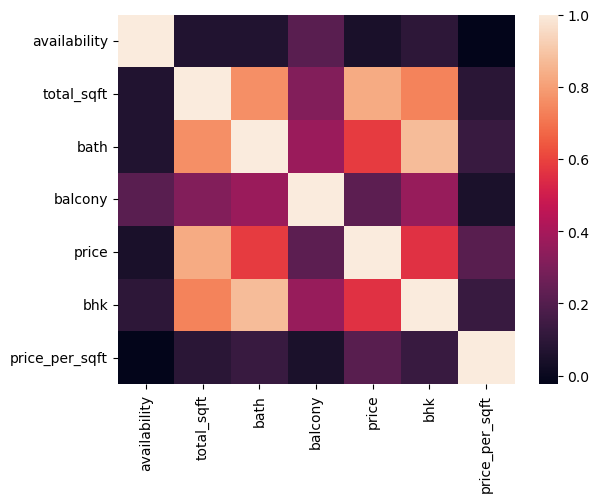

In [37]:
df.corr(numeric_only=True)['price']
sns.heatmap(df.corr(numeric_only=True))

In [51]:
df.drop(columns=['size'],axis=1,inplace=True)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16540\798808112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['size'],axis=1,inplace=True)


In [52]:
df.drop(columns=['balcony'],axis=1,inplace=True)

KeyError: "['balcony'] not found in axis"

In [53]:
df.drop(columns=['price_per_sqft'],axis=1,inplace=True)

KeyError: "['price_per_sqft'] not found in axis"

In [54]:
df.drop(columns=['society'],axis=1,inplace=True)

KeyError: "['society'] not found in axis"

In [55]:
# sns.boxplot(data=df,x='bhk')
# plt.xticks(rotation='horizontal')
df = df[df['bhk'] < 6]

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5')])

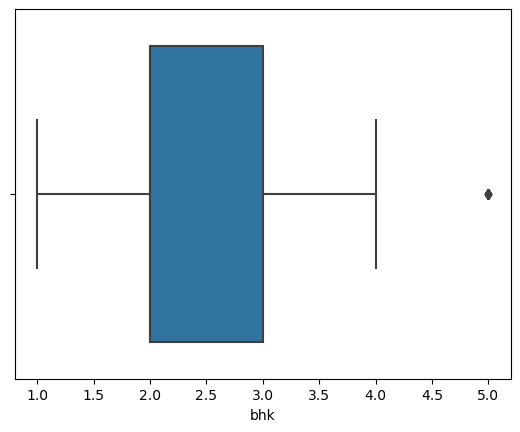

In [56]:
sns.boxplot(data=df,x='bhk')
plt.xticks(rotation='horizontal')

In [57]:
X = df.drop(columns = ['price'])
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [58]:
# X_train

In [59]:
# step1 = ColumnTransformer(transformers=[
#                          ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2])
#                  ], remainder='passthrough')
# step2 = StandardScaler() 
# step3 = Ridge()

# pipe = Pipeline([
#     ('step1', step1),
#     ('step2', step2),
#     ('step3', step3)
# ])

# pipe.fit(X_train, y_train)
# y_pred = pipe.predict(X_test)
# print("R2 score ", r2_score(y_test, y_pred))
# print("MAE score ", mean_absolute_error(y_test, y_pred))

In [60]:
X_train

,area_type,availability,location,total_sqft,bath,bhk
1635,Super built-up Area,1,Kodihalli,2700.0,4.0,3
7580,Built-up Area,1,others,1421.0,2.0,2
9886,Super built-up Area,1,Jakkur,5150.0,4.0,4
4736,Super built-up Area,1,Raja Rajeshwari Nagar,1240.0,2.0,2
9871,Super built-up Area,1,Iblur Village,5384.0,5.0,5
...,...,...,...,...,...,...
11843,Super built-up Area,1,Kundalahalli,1047.0,2.0,2
1150,Super built-up Area,0,Bommasandra,1035.0,2.0,2
8142,Super built-up Area,1,Hosakerehalli,3033.0,4.0,4
9989,Built-up Area,1,others,1130.0,2.0,2


<Axes: >

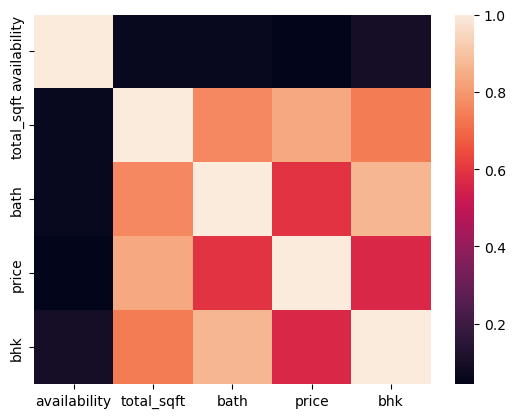

In [61]:
df.corr(numeric_only=True)['price']
sns.heatmap(df.corr(numeric_only=True))

In [66]:
step1 = ColumnTransformer(transformers=[
                         ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2])
                 ], remainder='passthrough')
step2 = StandardScaler() 
step3 = Ridge()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.7739566214784566
MAE score  26.10167646974915


In [63]:
import pickle 

In [65]:
pickle.dump(pipe,open('Ridgereg.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))